360.0 0 704
1080.0 0 2114


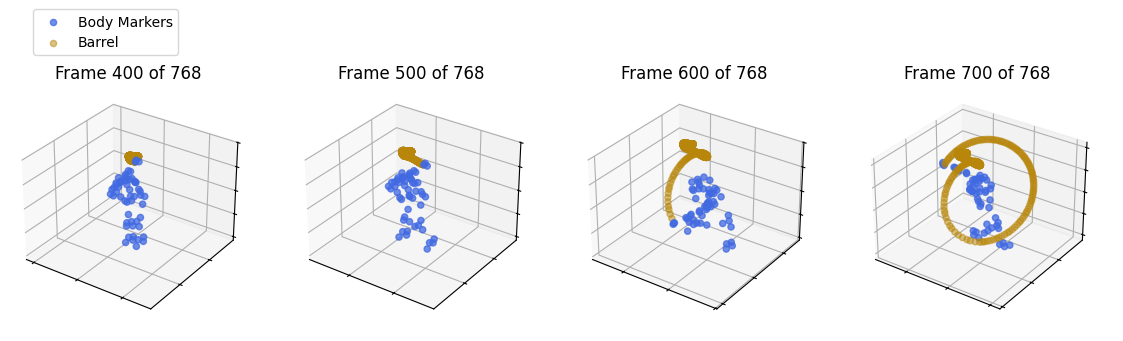

In [17]:
import ezc3d
import pandas as pd
import matplotlib.pyplot as plt

file = '/Users/jamesccoats/Downloads/000030_000302_68_174_R_004_998.c3d'

c= ezc3d.c3d(file)

num_markets = (c['header']['points']['size'])

point_frame_rate = (c['header']['points']['frame_rate'])
point_first_frame = (c['header']['points']['first_frame'])
point_last_frame = (c['header']['points']['last_frame'])

analog_frame_rate = (c['header']['analogs']['frame_rate'])
analog_first_frame = (c['header']['analogs']['first_frame'])
analog_last_frame = (c['header']['analogs']['last_frame'])

print(point_frame_rate, point_first_frame, point_last_frame)
print(analog_frame_rate, analog_first_frame, analog_last_frame)

points = c['data']['points']
analogs = c['data']['analogs']

labels = c["parameters"]["POINT"]["LABELS"]["value"]

marker5_index = [i for i, label in enumerate(labels) if label == "MARKER5"][0]

fig = plt.figure(figsize=(14, 5))
select_frames = [400, 500, 600, 700]
approx_swing_init_frame = 0
for i, frame in enumerate(select_frames):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    x = points[0, :, frame]
    y = points[1, :, frame]
    z = points[2, :, frame]
    marker_points = ax.scatter(x, y, z, alpha=0.75, color="royalblue")
    barrel_points = ax.scatter(
        xs=points[0, marker5_index, approx_swing_init_frame:frame],
        ys=points[1, marker5_index, approx_swing_init_frame:frame],
        zs=points[2, marker5_index, approx_swing_init_frame:frame],
        color="darkgoldenrod",
        alpha=0.5
    )
    ax.set_title(f"Frame {frame} of 768")
    ax.axis('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.view_init(elev=30, azim=-55, roll=0)

fig.legend((marker_points, barrel_points), ("Body Markers", "Barrel"), bbox_to_anchor=(0, 0.5, 0.25, 0.4));







In [ ]:
print(labels)
print(len(labels))

['C7', 'CLAV', 'LANK', 'LASI', 'LBHD', 'LELB', 'LFHD', 'LFIN', 'LFRM', 'LHEE', 'LKNE', 'LMANK', 'LMELB', 'LMKNE', 'LPSI', 'LSHO', 'LTHI', 'LTIB', 'LTOE', 'LUPA', 'LWRA', 'LWRB', 'Marker1', 'Marker10', 'Marker2', 'Marker3', 'Marker4', 'Marker5', 'Marker6', 'Marker7', 'Marker8', 'Marker9', 'RANK', 'RASI', 'RBAK', 'RBHD', 'RELB', 'RFHD', 'RFIN', 'RFRM', 'RHEE', 'RKNE', 'RMANK', 'RMELB', 'RMKNE', 'RPSI', 'RSHO', 'RTHI', 'RTIB', 'RTOE', 'RUPA', 'RWRA', 'RWRB', 'STRN', 'T10']
55


360.0 0 704


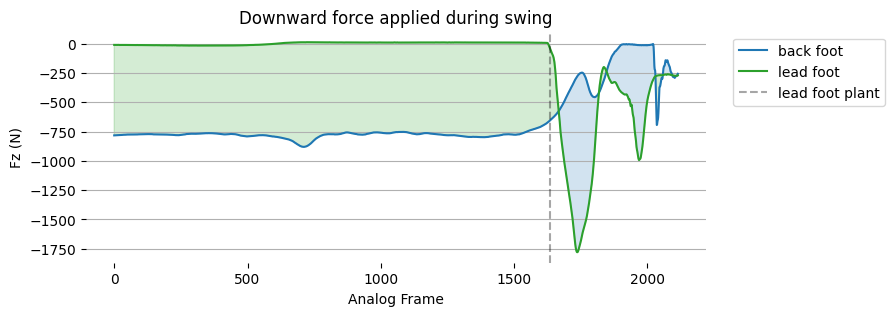

In [18]:
import numpy as np

analog_frame_rate = (c['header']['analogs']['frame_rate'])
analog_first_frame = (c['header']['analogs']['first_frame'])
analog_last_frame = (c['header']['analogs']['last_frame'])

print(point_frame_rate, point_first_frame, point_last_frame)

analog_points = c['data']['analogs']
analog_labels = c["parameters"]["ANALOG"]["LABELS"]["value"]
analog_units = c["parameters"]["ANALOG"]["UNITS"]["value"]

Fz1_index = [i for i, label in enumerate(analog_labels) if label == "Fz1"][0]
Fz4_index = [i for i, label in enumerate(analog_labels) if label == "Fz4"][0]

start_idx = int(0.4 * analog_points.shape[2])  # 40% into the trial

threshold = -100
lead_foot_force = analog_points[0, Fz1_index, :]

plant_candidates = np.where(lead_foot_force[start_idx:] < threshold)[0]
lead_foot_plant_frame = start_idx + plant_candidates[0] - 10

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
x = np.arange(analog_points.shape[2])
back_foot_force = analog_points[0, Fz4_index, :]
lead_foot_force = analog_points[0, Fz1_index, :]

ax.plot(x, back_foot_force, color="tab:blue",label="back foot")
ax.plot(x, lead_foot_force, color="tab:green", label="lead foot")
ax.fill_between(
    x,
    back_foot_force,
    lead_foot_force,
    where=back_foot_force>lead_foot_force,
    alpha=0.2,
    color="tab:blue"
)
ax.fill_between(
    x,
    back_foot_force,
    lead_foot_force,
    where=back_foot_force<=lead_foot_force,
    alpha=0.2,
    color="tab:green"
)
ax.axvline(lead_foot_plant_frame, color="black", linestyle="dashed", alpha=0.35, label="lead foot plant")
ax.set_xlabel("Analog Frame")
ax.set_ylabel(f"Fz ({analog_units[Fz4_index]})")
ax.set_title("Downward force applied during swing")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(axis="y")
ax.legend(bbox_to_anchor=(0, 0.5, 1.3, 0.5));


In [ ]:
import ezc3d
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def skeleton_plot_hitting(c3d_file):
    c = ezc3d.c3d(c3d_file)
    points = c['data']['points']
    labels = c["parameters"]["POINT"]["LABELS"]["value"]


    num_markets = (c['header']['points']['size'])
    point_frame_rate = (c['header']['points']['frame_rate'])
    point_first_frame = (c['header']['points']['first_frame'])
    point_last_frame = (c['header']['points']['last_frame'])

    frame_points = np.arrange(point_first_frame, point_last_frame, 4)

    skeleton_connections = [("LFIN", "LELB"), ("LELB", "LSHO"), ("LSHO," "C7"), ("C7", "RSHO"), ("RSHO", "RELB"), ("RELB", "RFIN"),
                            ("C7", "T10"), ("T10", "LIC"), ("LIC", "LKNEE"), ("LKNEE", "LANK"), ("T10", "RIC"), ("RIC", "RKNEE"), ("RKNE","RANK")]
    
    bat_connections = [("MARKER1", "MARKER2"), ("MARKER2", "MARKER3"), ("MARKER1", "MARKER3")]

    marker_dict = {label: i for i, label in enumerate(labels)}

    fig = plt.figure(figsize=(14, 5))
    select_frames = frame_points
    approx_swing_init_frame = 0
    for i, frame in enumerate(select_frames):
        ax = fig.add_subplot(1, len(select_frames), i+1, projection='3d')
        x = points[0, :, frame]
        y = points[1, :, frame]
        z = points[2, :, frame]
        marker_points = ax.scatter(x, y, z, alpha=0.75, color="royalblue")
        
        for connection in skeleton_connections:
            p1 = connection[0]
            p2 = connection[1]
            ax.plot(
                xs=[points[0, marker_dict[p1], frame], points[0, marker_dict[p2], frame]],
                ys=[points[1, marker_dict[p1], frame], points[1, marker_dict[p2], frame]],
                zs=[points[2, marker_dict[p1], frame], points[2, marker_dict[p2], frame]],
                color="darkorange",
                alpha=0.8,
                linewidth=2
            )
        
        for connection in bat_connections:
            p1 = connection[0]
            p2 = connection[1]
            ax.plot(
                xs=[points[0, marker_dict[p1], frame], points[0, marker_dict[p2], frame]],
                ys=[points[1, marker_dict[p1], frame], points[1, marker_dict[p2], frame]],
                zs=[points[2, marker_dict[p1], frame], points[2, marker_dict[p2], frame]],
                color="saddlebrown",
                alpha=0.8,
                linewidth=3
            )
        
        ax.set_title(f"Frame {frame} of {point_last_frame - point_first_frame + 1}")
        ax.axis('equal')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.view_init(elev=30, azim=-55, roll=0)
    fig.legend((marker_points,), ("Body Markers",), bbox_to_anchor=(0, 0.5, 0.25, 0.4));
    return fig




In [ ]:
skeleton_plot_hitting('/Users/jamesccoats/Downloads/000030_000302_68_174_R_004_998.c3d')